In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
import math
N = 500
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if(numbers_of_selections[i]>0):
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward+delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad]+1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward


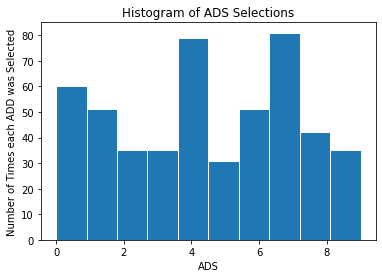

In [4]:
plt.hist(ads_selected,edgecolor='white')
plt.title('Histogram of ADS Selections')
plt.xlabel('ADS')
plt.ylabel('Number of Times each ADD was Selected')
plt.show()

In [5]:
pd.Series(ads_selected).head(1500).value_counts(normalize=True)

7    0.162
4    0.158
0    0.120
1    0.102
6    0.102
8    0.084
2    0.070
3    0.070
9    0.070
5    0.062
dtype: float64